In [107]:
%matplotlib inline

In [108]:
import pytpc
import pytpc.simulation
from pytpc.constants import pi, degrees

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [109]:
data_path = '../data/real/'
filename = 'run_0130.h5'
file = pytpc.HDFDataFile(data_path + filename, 'r')

In [232]:
labels = pd.read_csv(data_path+'run_0130_labels.csv', sep='\t')

#no 'iffy' events
#p_indices = labels.loc[(labels['label'] == 'p') & (labels['iffy'] != 0)]['evt_id'].index[:]

#all events
p_indices = labels.loc[(labels['label'] == 'j')]['evt_id'].index[:]

print(p_indices)

Int64Index([  0,   1,   2,   3,   4,   7,   8,   9,  10,  11,
            ...
            972, 977, 979, 983, 985, 987, 988, 990, 996, 999],
           dtype='int64', length=561)


In [233]:
print(len(file))

46456


In [234]:
i = 0

1


(0.0, 600.0)

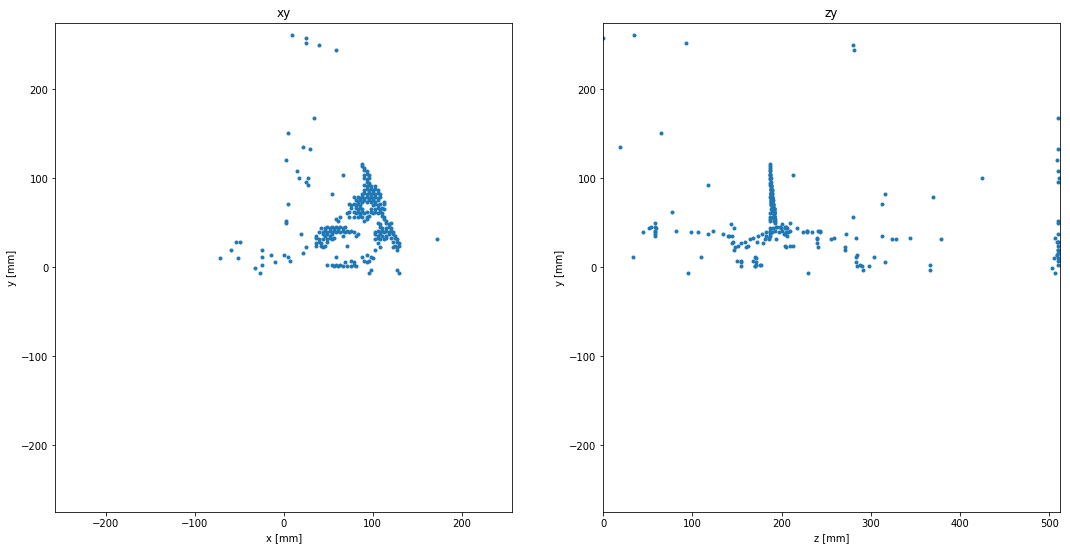

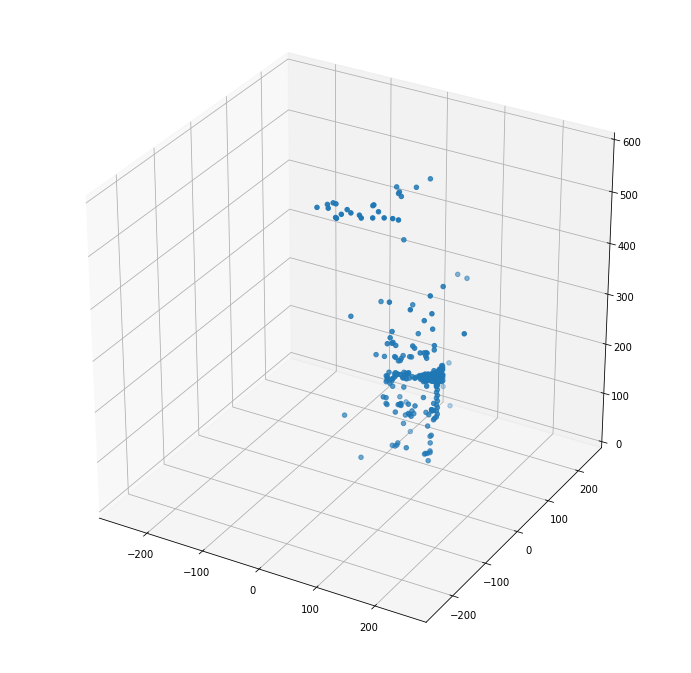

In [235]:
i += 1

print(p_indices[i])
#specific event
evt = file[p_indices[i]]

#xyzs = evt.xyzs(peaks_only=True, drift_vel=np.array([-0.0603573 , -0.55178666, -5.14005679]), clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)
xyzs = evt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

fig, ax = plt.subplots(1, 2, figsize=(18, 9))

ax[0].plot(xyzs[:,0], xyzs[:,1], '.')
ax[0].axis('equal')
        
ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('y [mm]')
ax[0].set_title('xy')
ax[0].set_xlim((-275, 275))
ax[0].set_ylim((-275, 275))
#######################################################################################################################
ax[1].plot(xyzs[:,2], xyzs[:,1], '.')
#ax[1].axis('equal')
        
ax[1].set_xlabel('z [mm]')
ax[1].set_ylabel('y [mm]')
ax[1].set_title('zy')
ax[1].set_xlim((0, 512))
ax[1].set_ylim((-275, 275))

#plt.ylim((-275, 275))

fig2 = plt.figure(figsize=(12,12))
ax2 = fig2.add_subplot(111, projection="3d")
ax2.scatter(xyzs[:,0], xyzs[:,1], xyzs[:,2])
ax2.axis('equal')
ax2.set_xlim(-275., 275.)
ax2.set_ylim(-275., 275.)
ax2.set_zlim(0., 600.)

42


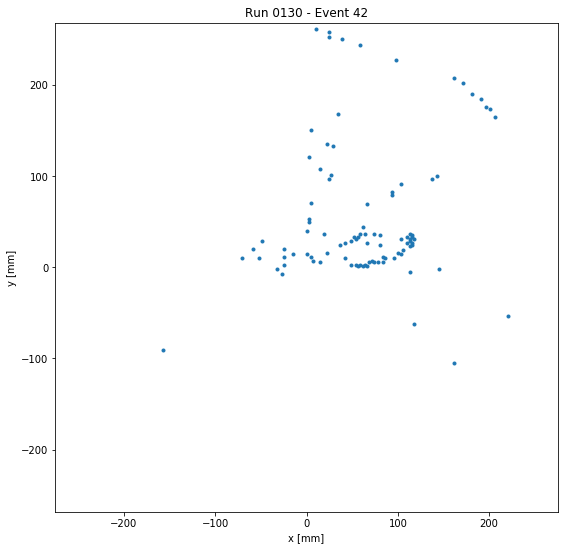

In [275]:
i += 1

print(p_indices[i])
#specific event
evt = file[p_indices[i]]

#xyzs = evt.xyzs(peaks_only=True, drift_vel=np.array([-0.0603573 , -0.55178666, -5.14005679]), clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)
xyzs = evt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

fig, ax = plt.subplots(1, 1, figsize=(9, 9))

ax.plot(xyzs[:,0], xyzs[:,1], '.')
ax.axis('equal')
        
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ax.set_title('Run 0130 - Event ' + str(p_indices[i]))
ax.set_xlim((-275, 275))
ax.set_ylim((-275, 275))

#plt.savefig('../plots/events/event_examples/run_0130_evt_' + str(p_indices[i]) + '.pdf')

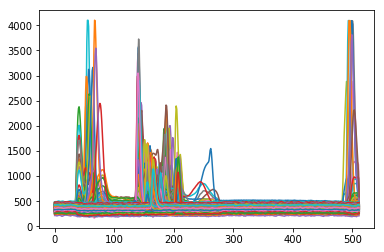

In [181]:
for trace in evt.traces['data']:
    plt.plot(trace)
    #print(len(trace))